In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import prophet
import seaborn as sns

from math import sqrt
from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
dataset = pd.read_csv('exchange.csv')

In [30]:
dataset.head()

,ds,y
0,11/18/2013,155.960007
1,11/25/2013,156.419998
2,12/2/2013,155.770004
3,12/9/2013,156.350006
4,12/16/2013,156.789993


In [31]:
dataset.describe()

,y
count,523.000000
mean,343.265996
std,132.292245
min,33.000000
25%,199.075005
50%,359.000000
75%,409.225006
max,845.000000


In [32]:
dataset.columns

Index(['ds', 'y'], dtype='object')

In [43]:
y = dataset.set_index('ds')

Text(0.5, 1.0, 'Exchange Naira Rate 2013 - 2018')

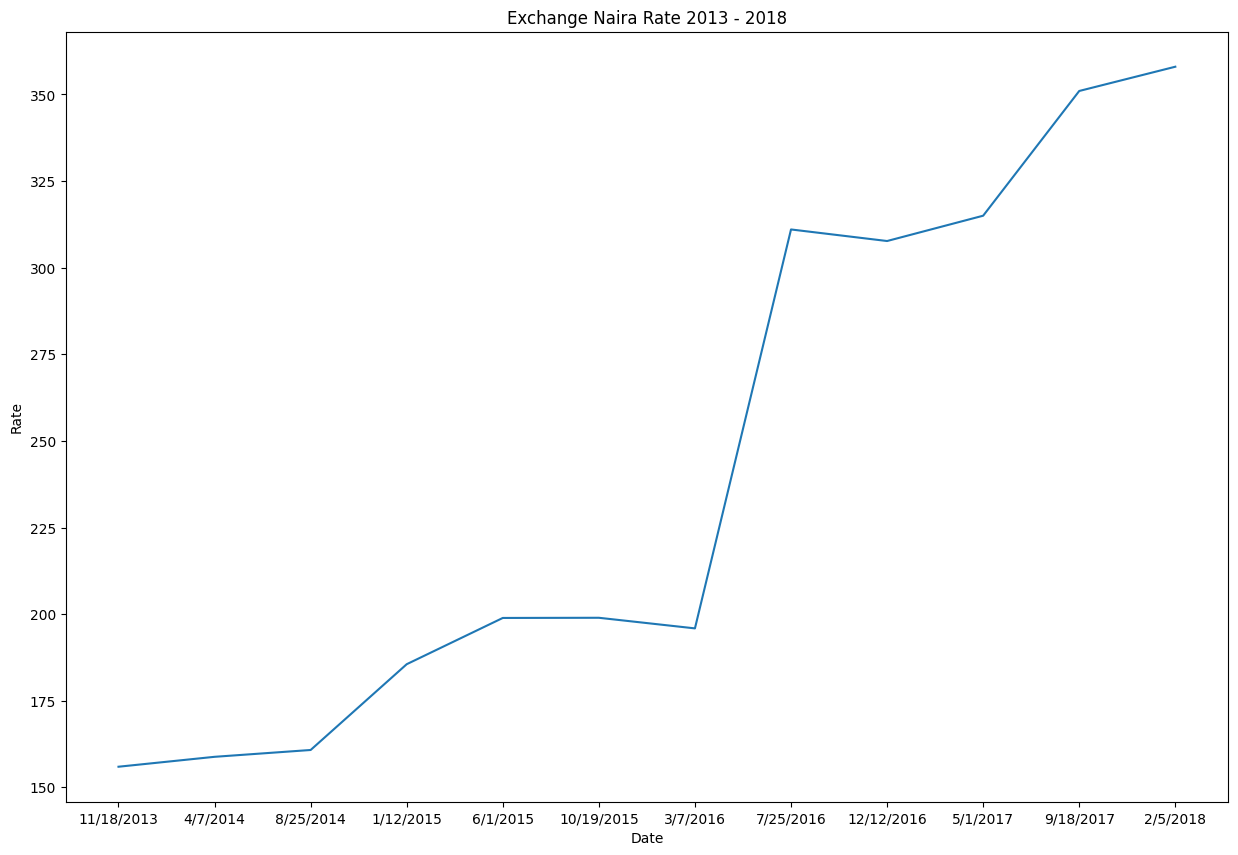

In [44]:
plt.figure(figsize=(15,10))
plt.plot(dataset['ds'][:240:20], dataset['y'][:240:20])
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Exchange Naira Rate 2013 - 2018')

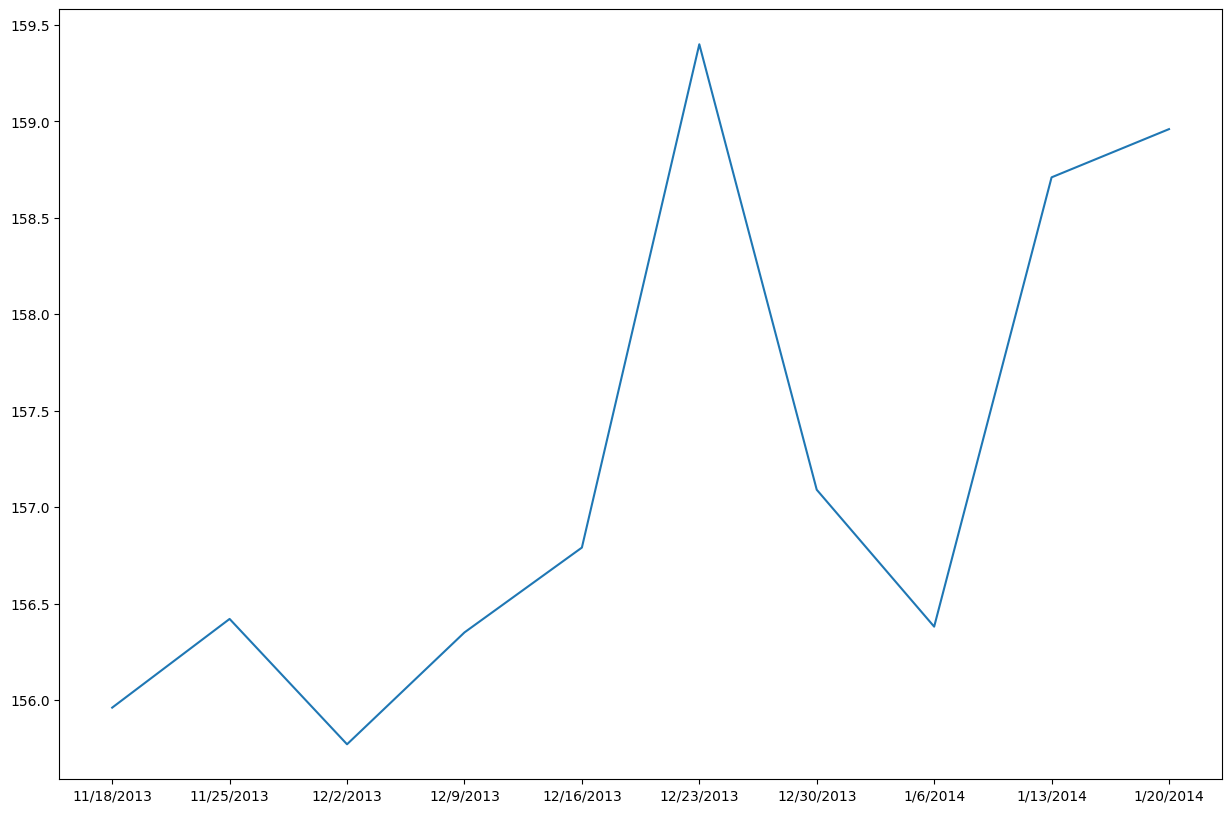

In [36]:
# Visualization
plt.figure(figsize=(15,10))
plt.plot(dataset['ds'][:10], dataset['y'][:10])
plt.show()

In [37]:
from prophet import Prophet

# Create an instance of the Prophet class
m = Prophet()

In [38]:
m.fit(dataset)

20:23:24 - cmdstanpy - INFO - Chain [1] start processing
20:23:33 - cmdstanpy - INFO - Chain [1] done processing


# Make Forecasts

In [39]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
883,2024-11-13
884,2024-11-14
885,2024-11-15
886,2024-11-16
887,2024-11-17


In [40]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
883,2024-11-13,830.158107,768.241165,891.947235
884,2024-11-14,828.898870,766.661799,885.874185
885,2024-11-15,827.548165,766.018769,894.751026
886,2024-11-16,978.607729,917.247488,1036.163567
887,2024-11-17,824.663256,761.423932,886.551036


c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


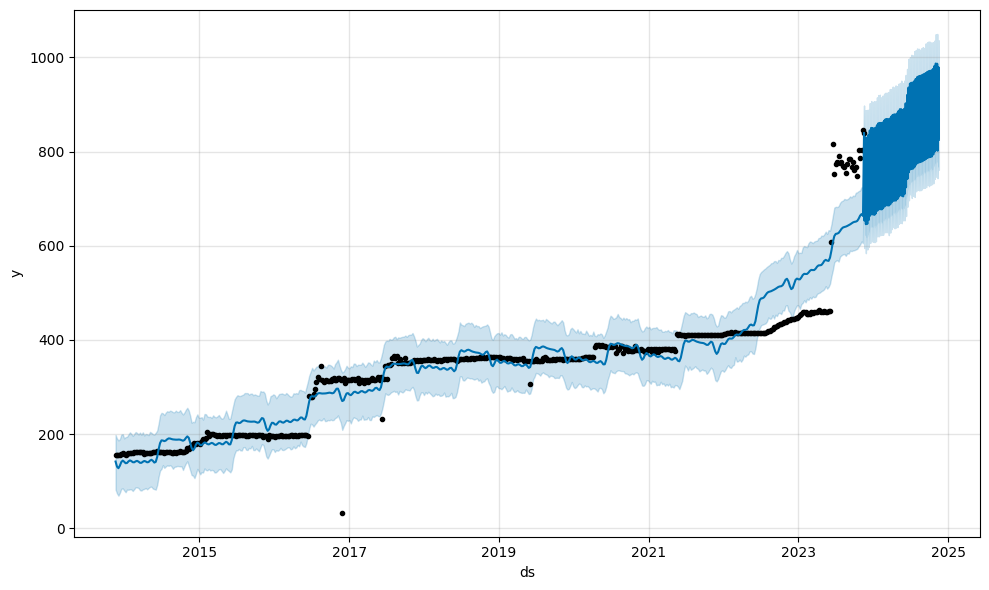

In [41]:
fig1 = m.plot(forecast)

# Plot Forecast Components

c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a 

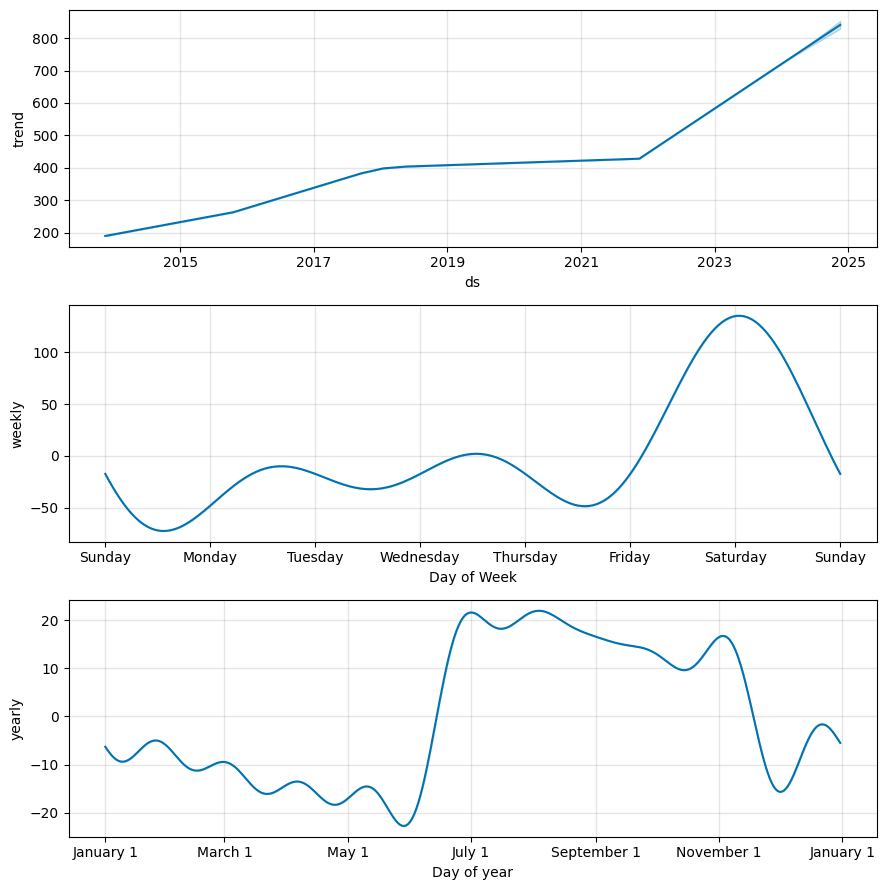

In [42]:
fig2 = m.plot_components(forecast)